In [ ]:
!pip install tensorflow opencv-python matplotlib


In [27]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [28]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [29]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [30]:
data_dir = 'data'

In [31]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [34]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(class_path):  # Ensure it's a directory
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                # Read the image using OpenCV
                img = cv2.imread(image_path)
                if img is None:
                    print(f"Failed to load image {image_path}. Removing it.")
                    os.remove(image_path)
                    continue

                # Check the image header type
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print(f"Image not in ext list: {image_path}. Removing it.")
                    os.remove(image_path)
            except Exception as e:
                print(f"Issue with image {image_path}: {e}")

In [36]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 6 files belonging to 2 classes.


In [37]:
data_iterator = data.as_numpy_iterator()

In [38]:
batch = data_iterator.next()

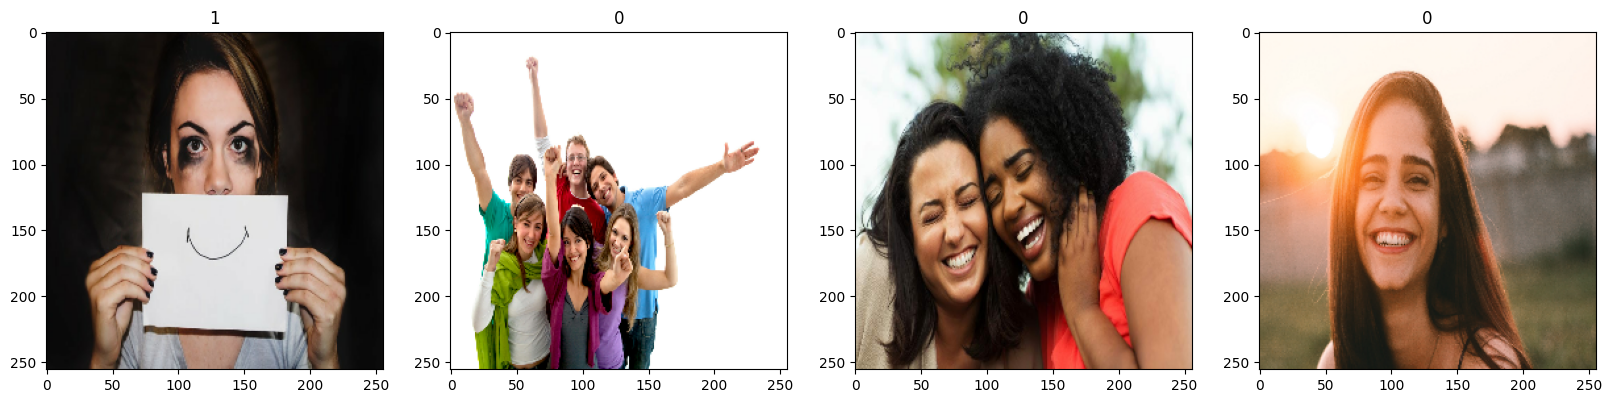

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# New Section